## Task C: Let's stay together, Circular orbit

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

First we have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$ (equal to zero since we're working with a circular orbit).

In [2]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e = 0               # we're in a circular orbit

part = ic_two_body(mass1, mass2, rp, e)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$. The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system.

In [3]:
a = rp / (1 - e)
M_tot = np.sum(part.mass)

P = np.sqrt((4 * np.pi**2. * a**3.)/(M_tot))
print(P)

40.55778675973612


Using the initial conditions we gave as input, the period is $P = 40.56$

### Evolution of the binary system

We have now to evolve the binary system from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration. 

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


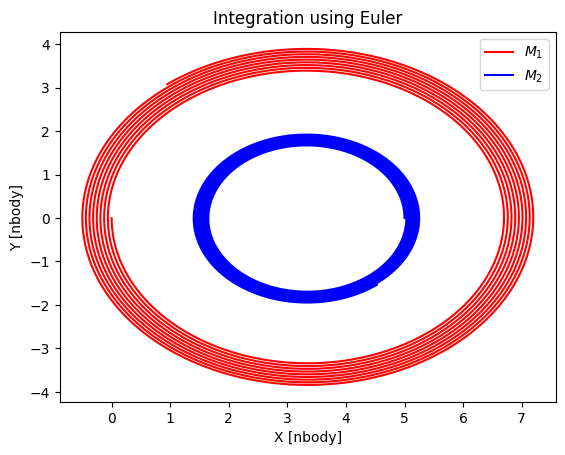

In [4]:
# euler
h = 0.01                    # timestep
tsimulation = 10*P          # end of the simulation
N = 2                       # number of particles

t = 0                       # simulation current time

path_1 = []
path_2 = []

while t < tsimulation:
    for j in range(1,N):
        result = integrator_euler(part, h, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
        

    t += h

path_1 = np.array(path_1)
path_2 = np.array(path_2)

# PLOT

plt.title('Integration using Euler')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


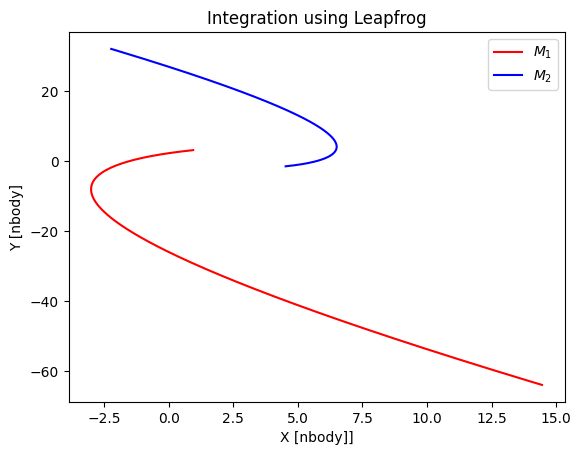

In [5]:
# leapfrog
h = 0.001                    # timestep
tsimulation = 10*P          # end of the simulation
N = 2                       # number of particles

t = 0                       # simulation current time

path_1 = []
path_2 = []

while t < tsimulation:
    for j in range(1,N):
        result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
        

    t += h

path_1 = np.array(path_1)
path_2 = np.array(path_2)

# PLOT 
plt.title('Integration using Leapfrog')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]]')
plt.ylabel('Y [nbody]')
plt.legend()
